<a href="https://colab.research.google.com/github/smeadows2/AI_Class/blob/main/Module_3_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

!pip install keras-tuner
import kerastuner as kt

     |████████████████████████████████| 102kB 4.5MB/s 
  Created wheel for kt-legacy: filename=kt_legacy-1.0.3-cp37-none-any.whl size=9569 sha256=3ab668c855202099ab601d9a8a0c9ec7b9311d1d806db20cff698f5b29b47ea0
  Stored in directory: /root/.cache/pip/wheels/95/99/a8/6b116b0f69be60cc475d1cd36680f3a09f284d86655bb99d93
Successfully built kt-legacy


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.


In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_train_small, X_train_nolabel = X_train_full[5000:6000], X_train_full[6000:]
y_train_small = y_train_full[5000:6000]

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# input vector (flatten image)
input_img = keras.Input(shape=[784])

# Encoder layers (excluding output layer)
e_hidden_1 = keras.layers.Dense(300, activation='relu')(input_img)
encoded = keras.layers.Dense(100, activation='relu')(e_hidden_1)

# Decoder layers
d_hidden_1 = keras.layers.Dense(300, activation='relu')(encoded)
decoded = keras.layers.Dense(784, activation='sigmoid')(d_hidden_1)

# Autoencoder model
autoencoder = keras.Model(inputs=[input_img], outputs=[decoded])

autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               30300     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               235984    
Total params: 531,884
Trainable params: 531,884
Non-trainable params: 0
_________________________________________________________________


In [4]:
autoencoder.compile(loss='mean_squared_error', 
                    optimizer = keras.optimizers.Nadam())
                    #optimizer = keras.optimizers.SGD(learning_rate=1e-3))

In [5]:
X_train_nolabel.shape

(54000, 28, 28)

In [6]:
X_flatten = X_train_nolabel.reshape(-1, 784)
X_valid_flatten = X_valid.reshape(-1, 784)
(X_flatten.shape, X_valid_flatten.shape)

((54000, 784), (5000, 784))

In [7]:
from skimage.util import random_noise
noisy_img = random_noise(X_flatten, clip=False)
noisy_valid_img = random_noise(X_valid_flatten, clip=False)

In [8]:
#history = autoencoder.fit(X_flatten, X_flatten, epochs=30, validation_data=(X_valid_flatten, X_valid_flatten))
history = autoencoder.fit(noisy_img, X_flatten, epochs=30, validation_data=(noisy_valid_img, X_valid_flatten))

Epoch 1/30
1688/1688 [==============================] - 26s 14ms/step - loss: 0.0215 - val_loss: 0.0140
Epoch 2/30
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0124 - val_loss: 0.0109
Epoch 3/30
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0104 - val_loss: 0.0102
Epoch 4/30
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0093 - val_loss: 0.0091
Epoch 5/30
1688/1688 [==============================] - 25s 15ms/step - loss: 0.0086 - val_loss: 0.0087
Epoch 6/30
1688/1688 [==============================] - 25s 15ms/step - loss: 0.0081 - val_loss: 0.0086
Epoch 7/30
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0077 - val_loss: 0.0078
Epoch 8/30
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0075 - val_loss: 0.0077
Epoch 9/30
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0073 - val_loss: 0.0075
Epoch 10/30
1688/1688 [==============================] - 24s 14m

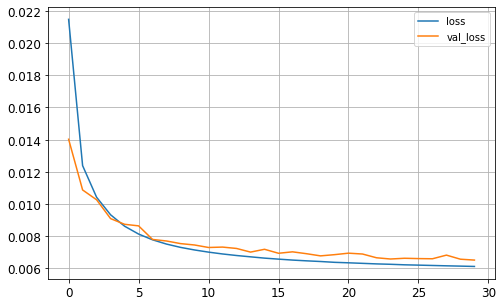

In [9]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [12]:
X_test = X_test.reshape(-1, 784)
idx = [np.where(y_test==c)[0][0] for c in range(10)]
origin_images = X_test[idx]
noisy_origin_images = random_noise(origin_images, clip=False)
reconst_images = autoencoder.predict(noisy_origin_images)

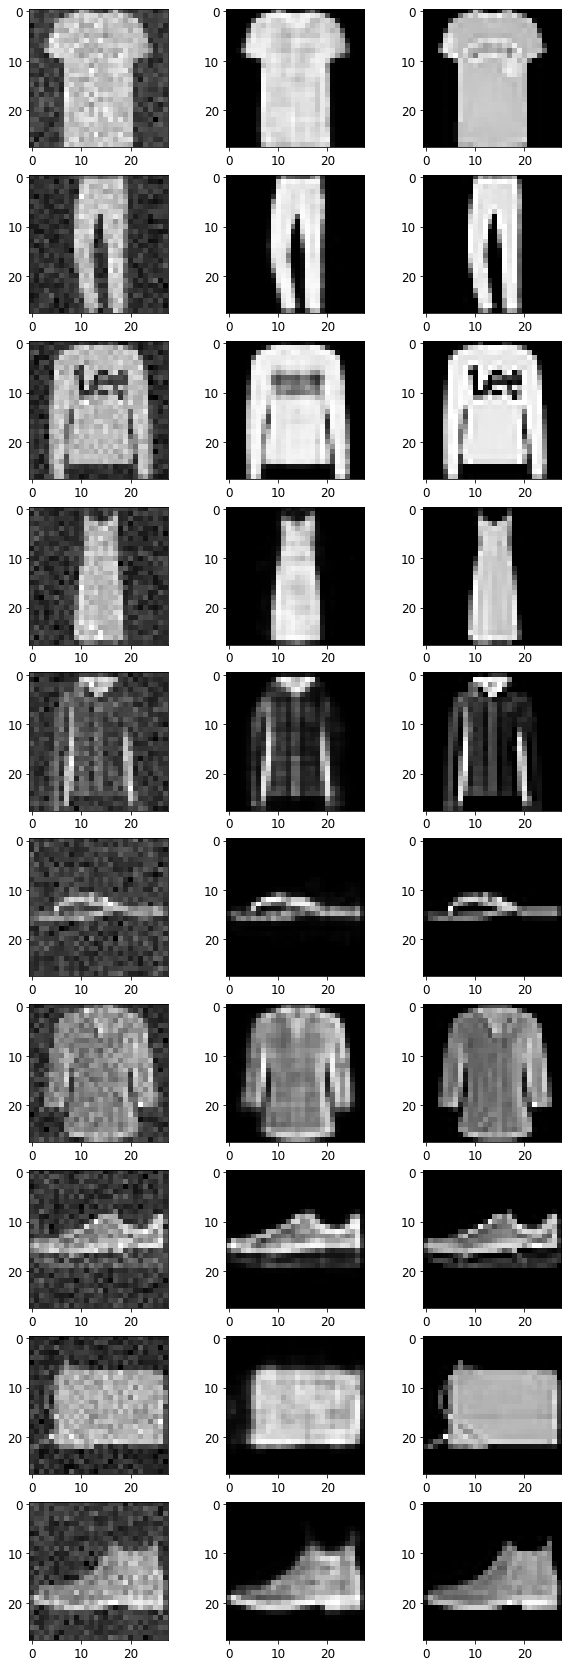

In [16]:
plt.figure(figsize=(10,30))
for i in range(10):
    plt.subplot(10,3,i*3+1)
    plt.imshow(noisy_origin_images[i].reshape(28,28), cmap="gray")
    plt.subplot(10,3,i*3+2)
    plt.imshow(reconst_images[i].reshape(28,28), cmap="gray")
    plt.subplot(10,3,i*3+3)
    plt.imshow(origin_images[i].reshape(28,28), cmap="gray")
plt.show()